In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
data=pd.read_csv("Datasets/fer2013.csv")

In [3]:
labels = data.iloc[:,[0]].values
labels

array([[0],
       [0],
       [2],
       ...,
       [0],
       [3],
       [2]], dtype=int64)

In [4]:
pixels = data['pixels']
pixels

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object

In [5]:
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [6]:
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')
images

array([[[[0.27450982],
         [0.3137255 ],
         [0.32156864],
         ...,
         [0.20392157],
         [0.16862746],
         [0.16078432]],

        [[0.25490198],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862746],
         [0.21176471],
         ...,
         [0.19215687],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490198],
         [0.16470589],
         ...,
         [0.28235295],
         [0.21960784],
         [0.16862746]],

        [[0.3019608 ],
         [0.32156864],
         [0.30980393],
         ...,
         [0.4117647 ],
         [0.27450982],
         [0.18039216]],

        [[0.3019608 ],
         [0.28235295],
         [0.32941177],
         ...,
         [0.41568628],
         [0.42745098],
         [0.32156864]]],


       [[[0.5921569 ],
         [0.5882353 ],
         [0.57

In [7]:
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [8]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [10]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)       

In [11]:
model.fit(train_images,train_labels,batch_size=105,epochs=5,verbose=2)

Epoch 1/5
 - 582s - loss: 1.8369 - accuracy: 0.3449
Epoch 2/5
 - 579s - loss: 1.4687 - accuracy: 0.4462
Epoch 3/5
 - 584s - loss: 1.2929 - accuracy: 0.5062
Epoch 4/5
 - 610s - loss: 1.1921 - accuracy: 0.5476
Epoch 5/5
 - 603s - loss: 1.1150 - accuracy: 0.5729


In [12]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[0.32674298 0.00832466 0.06763788 0.14568158 0.27679501 0.01768991
  0.15712799]
 [0.12264151 0.29245283 0.09433962 0.18867925 0.21698113 0.00943396
  0.0754717 ]
 [0.08946322 0.00397614 0.27236581 0.12326044 0.29920477 0.10536779
  0.10636183]
 [0.01469788 0.         0.01469788 0.85302123 0.05988024 0.00925422
  0.04844856]
 [0.06502776 0.00158604 0.0777161  0.09357653 0.5963521  0.00713719
  0.15860428]
 [0.01251564 0.         0.10137672 0.09887359 0.06508135 0.66708385
  0.05506884]
 [0.03228477 0.         0.04635762 0.11258278 0.24586093 0.01903974
  0.54387417]]


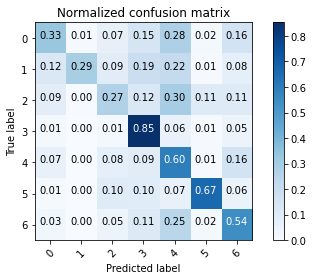

In [13]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)

cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [14]:
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

In [15]:
filename='model_weights.hdf5'
model.load_weights(filename)

In [16]:
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]

In [17]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("bundle_archive/haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
face_in_video()